In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [3]:
df_noad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
df_ad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_noad = thermo_df(df_noad)
df_ad = thermo_df(df_ad)

In [4]:
# df_mock = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
# df_rsv = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/6_RSV1_10ul_9min_NewOmics.xlsx')
df_mock = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_rsv = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df_mock = thermo_df(df_mock)
df_rsv = thermo_df(df_rsv)
df_mock.shape, df_rsv.shape

((4593, 5), (2727, 5))

In [5]:
df_25k_rsv = df_rsv[(df_rsv.Mass>24000) & (df_rsv.Mass<25000)]
# plotly_zone(df_25k_rsv)

In [6]:
shift = 5
df1 = match_dfs(df_25k_rsv, df_25k_rsv, shift=shift)
df2 = match_dfs(df_25k_rsv, df_25k_rsv, shift=-1*shift)
df1, df2

(Empty DataFrame
 Columns: [Mass, RT, Vol, RA, FA]
 Index: [],
 Empty DataFrame
 Columns: [Mass, RT, Vol, RA, FA]
 Index: [])

In [7]:
df_25k_noad = df_noad[(df_noad.Mass > 23000) & (df_noad.Mass < 24500) & (df_noad.RT < 5) & (df_noad.Vol > 1E5)]
# plotly_zone(df_25k_noad, y='RT')

In [8]:
df_25k_ad = df_ad[(df_ad.Mass > 24000) & (df_ad.Mass < 24500) & (df_ad.Vol > 1E5)]
# plotly_zone(df_25k_ad, y='RT')

In [9]:
df_mock_25k = df_mock[(df_mock.Mass>23800) & (df_mock.Mass<24500) & (df_mock.RT<4) & (df_mock.RT>3)]  #24500
df_rsv_25k = df_rsv[(df_rsv.Mass>23800) & (df_rsv.Mass<24500) & (df_rsv.RT<4) & (df_rsv.RT>3)]
# plotly_zones(df_mock_25k, df_rsv_25k)

In [10]:
# df_mock_25k = df_mock[(df_mock.Mass > 24000) & (df_mock.Mass < 24400) & (df_mock.RT > 1)  &(df_mock.RT < 4)& (df_mock.Vol > 0.5*1E5)] #
# df_rsv_25k = df_rsv[(df_rsv.Mass > 24000) & (df_rsv.Mass < 24400) & (df_rsv.RT > 1) & (df_rsv.RT < 4)& (df_rsv.Vol > 0.5*1E5)] #
# df_mock_25k.shape, df_rsv_25k.shape
df_mock_25k = df_mock[(df_mock.Mass > 24000) & (df_mock.Mass < 24400)] #
df_rsv_25k = df_rsv[(df_rsv.Mass > 24000) & (df_rsv.Mass < 24400)] #
df_mock_25k.shape, df_rsv_25k.shape

((30, 5), (29, 5))

781    616248.16
Name: Vol, dtype: float64 1057    361732.81
Name: Vol, dtype: float64


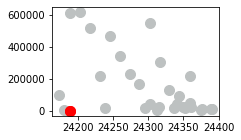

In [14]:
# Vol
df_a = df_mock_25k.copy()
df_b = df_rsv_25k.copy()
# # df_b.RT = df_b.RT / 6.53
# df_a['isRSV'] = False
# df_b['isRSV'] = True
# df_merge = pd.concat([df_a, df_b])

# bcr = base_calling_random(df_a, silence=True, homology=True)
# print('Mock Methyl Count: ', len(bcr[1]))
# plt, fig = plot_basecalling(df_a, bcr[1], annotate=True)
# bcr = base_calling_random(df_b, silence=True, homology=True)
# print('RSV Methyl Count: ', len(bcr[1]))
# plt, fig = plot_basecalling(df_b, bcr[1], annotate=True, plt=plt, color='g', marker='*', fig=fig)

df_sample = df_a
ms = 24189.23 #24268.30 #24267.31 #
mask = np.abs(df_sample.Mass - ms) < 0.1
specific_dot = df_sample[mask]
df_sample = df_b
ms = 24189.23 #24268.30 #24267.31 #
mask = np.abs(df_sample.Mass - ms) < 0.1
specific_dot2 = df_sample[mask]
print(specific_dot.Vol, specific_dot2.Vol)

# df_25k = df_phe[(df_phe.Mass>24000)&(df_phe.Mass<24800)]
# plot_zone(df_25k, y='Vol')
fig = plt.figure(figsize=(3, 2))
vol1 = 616248.16
vol2 = 361732.81
plt.scatter(df_a.Mass, df_a.Vol/vol1, s=100, color='#bdc1c1')
plt.scatter(df_b.Mass, df_b.Vol/vol2, s=100, color='#d9d9d9')
plt.scatter(specific_dot.Mass, specific_dot.Vol/vol1, s=100, color='r')
plt.scatter(specific_dot2.Mass, specific_dot2.Vol/vol2, s=100, color='r')
# output(plt, fig, 'vol')

# output(plt, fig, 'homology_vol')

In [116]:
df_mock[(df_mock.Mass>24189) & (df_mock.Mass<24189+1 + 3*14.0106)]

,Mass,RT,Vol
767,24203.244116,24.382291,620152.37
781,24189.233530,24.382291,616248.16
909,24217.272292,24.201517,521214.74
1536,24231.253775,24.323343,220246.28


RSV Methyl Count:  25


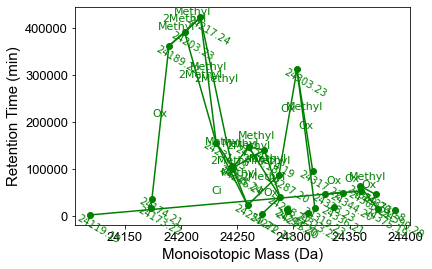

In [23]:
df_a = df_mock_25k.copy()
df_b = df_rsv_25k.copy()
# # df_b.RT = df_b.RT / 6.53
# df_a['isRSV'] = False
# df_b['isRSV'] = True
# df_merge = pd.concat([df_a, df_b])

# bcr = base_calling_random(df_a, silence=True, homology=True)
# print('Mock Methyl Count: ', len(bcr[1]))
# plt, fig = plot_basecalling(df_a, bcr[1], annotate=True)
bcr = base_calling_random(df_b, silence=True, homology=True)
print('RSV Methyl Count: ', len(bcr[1]))
plt, fig = plot_basecalling(df_b, bcr[1], annotate=True, plt=plt, color='g', marker='*', fig=fig, y='Vol')

# output(plt, fig, 'homology_mock_rsv')

In [13]:
df_mock_25k_2 = df_mock[(df_mock.Mass > 23800) & (df_mock.Mass < 24300)] #
df_a = df_mock_25k_2.copy()
df_a = df_a[df_a.Vol>100000]
# df_b = df_rsv_25k.copy()

specific_dot = df_mock[(df_mock.Mass>24189) & (df_mock.Mass<24189+1 + 2*14.0106)]
bcr = base_calling_random(specific_dot, silence=True, homology=True)
# print('RSV Methyl Count: ', len(bcr[1]))
plt, fig = plot_basecalling(specific_dot, bcr[1], annotate=True, plt=plt, s=100, color='#bdc1c1', marker='*', fig=fig, y='Vol')


# df_sample = df_a
# ms = 24189.23 #24268.30 #24267.31 #
# masses = [24189.23]
# mask = np.abs(df_sample.Mass - ms) < 0.1
# specific_dot = df_sample[mask]
# plt.scatter(specific_dot.Mass, specific_dot.Vol, s=100, color='r')

output(plt, fig, 'homology_mock')


NameError: name 'fig' is not defined

(70, 3)


/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/ipykernel_launcher.py:61: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


NameError: name 'output' is not defined

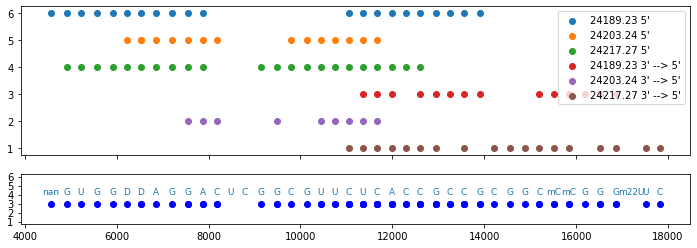

In [14]:
# 5p & 3p --> 5p

%run ../Glu/data.ipynb
%run ../modules/cds.ipynb
df1_5p = load_glu_data_mock(glu_isoforms[0], refined=True)
df2_5p = load_glu_data_mock(glu_isoforms[1], refined=True)
df3_5p = load_glu_data_mock(glu_isoforms[2], refined=True)
df1_3p = load_glu_data_mock(glu_isoforms[0], orientation=3, refined=True)
df2_3p = load_glu_data_mock(glu_isoforms[1], orientation=3, refined=True)
df3_3p = load_glu_data_mock(glu_isoforms[2], orientation=3, refined=True)
df1_3p_rev = df1_3p.copy()
df1_3p_rev.Mass = glu_mock_masses[0] - df1_3p_rev.Mass + H2O
df2_3p_rev = df2_3p.copy()
df2_3p_rev.Mass = glu_mock_masses[1] - df2_3p_rev.Mass + H2O
df3_3p_rev = df3_3p.copy()
df3_3p_rev.Mass = glu_mock_masses[2] - df3_3p_rev.Mass + H2O

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 4), sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})


# dfs = [(df1_5p, f"{glu_mock_masses[0]} 5'"), (df2_5p, f"{glu_mock_masses[1]} 5'"), (df3_5p, f"{glu_mock_masses[2]} 5'"), 
#        (df1_3p_rev, f"{glu_mock_masses[0]} 3' --> 5'"), (df2_3p_rev, f"{glu_mock_masses[1]} 3' --> 5'"), (df3_3p_rev, f"{glu_mock_masses[2]} 3' --> 5'")]

dfs = [(df1_5p, f"{glu_mock_masses[0]} 5'"), 
       (df2_5p, f"{glu_mock_masses[1]} 5'"), 
       (df3_5p, f"{glu_mock_masses[2]} 5'"), 
       (df1_3p_rev, f"{glu_mock_masses[0]} 3' --> 5'"), 
       (df2_3p_rev, f"{glu_mock_masses[1]} 3' --> 5'"), 
       (df3_3p_rev, f"{glu_mock_masses[2]} 3' --> 5'")
      ]
total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
#     if 'Position' in df_iso.columns:
#         df_iso['pos'] = df_iso.Position
#     else:
#         df_iso['pos'] = df_iso.Mass/320
#         df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
ax1.legend()

vols = ['Mass', 'RT', 'Vol']
df_merge_5p = pd.concat(df_isoforms)[vols].drop_duplicates(subset=['Mass', 'RT'])
# df_merge_5p = pd.read_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge_analysis.xlsx')
print(df_merge_5p.shape)
ax2.scatter(df_merge_5p.Mass, [3]*df_merge_5p.shape[0], color='b')
# ax2.scatter(df_phe_final_5p.Position, [3]*df_phe_final_5p.shape[0], color='b')

# bcr = base_calling_random(df_sample)
# df_seats = process_mass_base_seats(*bcr, full_mass=glu_mock_masses[2], orientation=5)
# df_seats.to_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge_seats.xlsx')
df_seats = pd.read_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge_seats_analysis.xlsx')
for idx, row in df_seats.iterrows():
    x_pos = row.Mass #int(row.Mass/320)
    y_pos = 4
    plt.annotate(s=row.Base, size=9, xy=(x_pos, y_pos), textcoords="offset points", xytext=(0, 0), ha='center', color='C0')

df_sample = df_merge_5p[['Mass', 'Vol', 'RT']].drop_duplicates().sort_values('Mass').copy()
df_sample = df_sample.reset_index()
# print(df_sample.head(), df_sample.tail())
# df_sample.to_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge.xlsx')

output(plt, fig, 'glu_complement_5p3p')


(146, 3)


/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/ipykernel_launcher.py:71: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



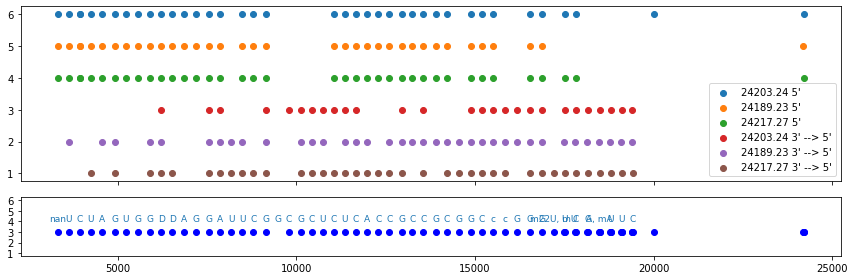

In [35]:
# Mock Direct Mock 5p & 3p --> 5p

%run ../Glu/data.ipynb
%run ../modules/cds.ipynb

mode ='Mock'
func = load_glu_direct_ut_data
isoforms = glu_isoforms
masses = glu_mock_masses
df1_5p = func(mode, isoforms[0], refined=False)
df2_5p = func(mode, isoforms[1], refined=False)
df3_5p = func(mode, isoforms[2], refined=False)
df1_3p = func(mode, isoforms[0], orientation=3, refined=False)
df2_3p = func(mode, isoforms[1], orientation=3, refined=False)
df3_3p = func(mode, isoforms[2], orientation=3, refined=False)
df1_3p_rev = df1_3p.copy()
df1_3p_rev.Mass = masses[0] - df1_3p_rev.Mass + H2O
df2_3p_rev = df2_3p.copy()
df2_3p_rev.Mass = masses[1] - df2_3p_rev.Mass + H2O
df3_3p_rev = df3_3p.copy()
df3_3p_rev.Mass = masses[2] - df3_3p_rev.Mass + H2O

df1_3p_rev = df1_3p_rev[df1_3p_rev.Mass>200]
df2_3p_rev = df2_3p_rev[df2_3p_rev.Mass>200]
df3_3p_rev = df3_3p_rev[df3_3p_rev.Mass>200]

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 4), sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})

dfs = [
       (df2_5p, f"{glu_mock_masses[1]} 5'"), 
        (df1_5p, f"{glu_mock_masses[0]} 5'"), 
       (df3_5p, f"{glu_mock_masses[2]} 5'"), 
       (df2_3p_rev, f"{glu_mock_masses[1]} 3' --> 5'"), 
       (df1_3p_rev, f"{glu_mock_masses[0]} 3' --> 5'"), 
       (df3_3p_rev, f"{glu_mock_masses[2]} 3' --> 5'")
      ]
total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
#     if 'Position' in df_iso.columns:
#         df_iso['pos'] = df_iso.Position
#     else:
#         df_iso['pos'] = df_iso.Mass/320
#         df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
ax1.legend()

vols = ['Mass', 'RT', 'Vol']
df_sample = merge_samples(df_isoforms)
# df_merge_5p = pd.read_excel('/Users/bryan/Documents/BioTechData/GluDirect/Mock/merge_analysis.xlsx')
print(df_merge_5p.shape)
ax2.scatter(df_sample.Mass, [3]*df_sample.shape[0], color='b')
# ax2.scatter(df_phe_final_5p.Position, [3]*df_phe_final_5p.shape[0], color='b')

generate_seats = False
if generate_seats:
    bcr = base_calling_random(df_sample)
    df_seats = process_mass_base_seats(*bcr, full_mass=glu_mock_masses[2], orientation=5)
    df_seats.to_excel('/Users/bryan/Documents/BioTechData/GluDirect/Mock/merge_seats.xlsx')
else:
    df_seats = pd.read_excel('/Users/bryan/Documents/BioTechData/GluDirect/Mock/merge_seats_analysis.xlsx')
    for idx, row in df_seats.iterrows():
        x_pos = row.Mass #int(row.Mass/320)
        y_pos = 4
        plt.annotate(s=row.Base, size=9, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(0, 0), ha='center', color='C0')

df_sample = df_merge_5p[['Mass', 'Vol', 'RT']].drop_duplicates().sort_values('Mass').copy()
df_sample = df_sample.reset_index()
# print(df_sample.head(), df_sample.tail())
# df_sample.to_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge.xlsx')

output(plt, fig, 'glu_direct_complement_5p3p')



(56, 5)


/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



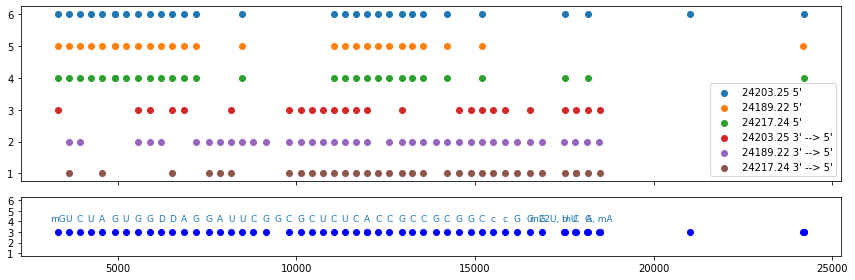

In [40]:
# Mock Direct RSV 5p & 3p --> 5p

%run ../Glu/data.ipynb
%run ../modules/cds.ipynb

mode ='RSV'
func = load_glu_direct_ut_data
isoforms = glu_isoforms
masses = glu_rsv_masses
df1_5p = func(mode, isoforms[0], refined=False)
df2_5p = func(mode, isoforms[1], refined=False)
df3_5p = func(mode, isoforms[2], refined=False)
df1_3p = func(mode, isoforms[0], orientation=3, refined=False)
df2_3p = func(mode, isoforms[1], orientation=3, refined=False)
df3_3p = func(mode, isoforms[2], orientation=3, refined=False)
df1_3p_rev = df1_3p.copy()
df1_3p_rev.Mass = masses[0] - df1_3p_rev.Mass + H2O
df2_3p_rev = df2_3p.copy()
df2_3p_rev.Mass = masses[1] - df2_3p_rev.Mass + H2O
df3_3p_rev = df3_3p.copy()
df3_3p_rev.Mass = masses[2] - df3_3p_rev.Mass + H2O

df1_3p_rev = df1_3p_rev[df1_3p_rev.Mass>200]
df2_3p_rev = df2_3p_rev[df2_3p_rev.Mass>200]
df3_3p_rev = df3_3p_rev[df3_3p_rev.Mass>200]

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 4), sharex=True, sharey=True, gridspec_kw={'height_ratios': [3, 1]})

dfs = [
       (df2_5p, f"{masses[1]} 5'"), 
        (df1_5p, f"{masses[0]} 5'"), 
       (df3_5p, f"{masses[2]} 5'"), 
       (df2_3p_rev, f"{masses[1]} 3' --> 5'"), 
       (df1_3p_rev, f"{masses[0]} 3' --> 5'"), 
       (df3_3p_rev, f"{masses[2]} 3' --> 5'")
      ]
total = len(dfs)
df_isoforms = list()
for idx, item in enumerate(dfs):
    df_iso = item[0].copy()
#     if 'Position' in df_iso.columns:
#         df_iso['pos'] = df_iso.Position
#     else:
#         df_iso['pos'] = df_iso.Mass/320
#         df_iso.pos.astype(int)
    label = item[1]
    ax1.scatter(df_iso.Mass, [total - idx]*len(df_iso.Mass), label=label)
    
    df_iso['Isoform'] = idx + 1
    df_isoforms.append(df_iso)
ax1.legend()

vols = ['Mass', 'RT', 'Vol']
df_sample = merge_samples(df_isoforms)
df_sample.to_excel(f'/Users/bryan/Documents/BioTechData/GluDirect/{mode}/merge.xlsx')
# df_merge_5p = pd.read_excelf('/Users/bryan/Documents/BioTechData/GluDirect/{mode}/merge_analysis.xlsx')
print(df_sample.shape)
ax2.scatter(df_sample.Mass, [3]*df_sample.shape[0], color='b')
# ax2.scatter(df_phe_final_5p.Position, [3]*df_phe_final_5p.shape[0], color='b')

generate_seats = False
if generate_seats:
    bcr = base_calling_random(df_sample)
    df_seats = process_mass_base_seats(*bcr, full_mass=masses[2], orientation=5)
    df_seats.to_excel(f'/Users/bryan/Documents/BioTechData/GluDirect/{mode}/merge_seats.xlsx')
else:
    df_seats = pd.read_excel(f'/Users/bryan/Documents/BioTechData/GluDirect/{mode}/merge_seats_analysis.xlsx')
    for idx, row in df_seats.iterrows():
        x_pos = row.Mass #int(row.Mass/320)
        y_pos = 4
        plt.annotate(s=row.Base, size=9, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(0, 0), ha='center', color='C0')

df_sample = df_merge_5p[['Mass', 'Vol', 'RT']].drop_duplicates().sort_values('Mass').copy()
df_sample = df_sample.reset_index()
# print(df_sample.head(), df_sample.tail())
# df_sample.to_excel('/Users/bryan/Documents/BioTechData/Glu/Mock/merge.xlsx')

output(plt, fig, 'glu_direct_rsv_complement_5p3p')




In [22]:
def merge_samples(dfs):
    vols = ['Mass', 'RT', 'Vol']
    df_merge = pd.concat(dfs)[vols].drop_duplicates(subset=['Mass', 'RT'])
    df_sample = df_merge[['Mass', 'Vol', 'RT']].drop_duplicates().sort_values('Mass').copy()
    df_sample['RoundedMass'] = np.round(df_sample.Mass, 0)
    df_sample = df_sample.sort_values('RoundedMass')
    df_sample = df_sample.sort_values('Vol', ascending=False)
    df_sample = df_sample.groupby('RoundedMass').head(1)
    return df_sample.reset_index()

In [16]:
plotly_zone(df1_3p)

Mock Methyl Count:  0
RSV Methyl Count:  1


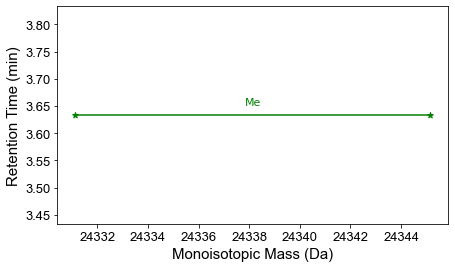

In [32]:
df_comm = match_dfs(df_a, df_b)
df_b_new = df_b.drop(df_comm.index)
df_comm = match_dfs(df_b, df_a)
df_a_new = df_a.drop(df_comm.index)
# plotly_zone(df_a_new)
# plotly_zone(df_b_new)

bcr = base_calling_random(df_a_new, silence=True, homology=True)
print('Mock Methyl Count: ', len(bcr[1]))
plt, fig = plot_basecalling(*bcr, annotate=False)
bcr = base_calling_random(df_b_new, silence=True, homology=True)
print('RSV Methyl Count: ', len(bcr[1]))
plt, fig = plot_basecalling(*bcr, annotate=False, plt=plt, color='g', marker='*', fig=fig)

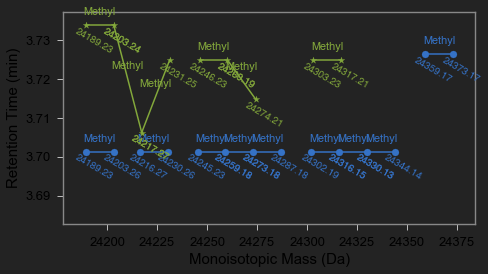

In [108]:
df_a = df_25k_noad.copy()
df_b = df_25k_ad.copy()
df_b.RT = df_b.RT / 6.53
df_a['isAD'] = False
df_b['isAD'] = True
df_merge = pd.concat([df_a, df_b])

bcr = base_calling_random(df_a, silence=True, homology=True)
plt, fig = plot_basecalling(*bcr, annotate=True)
bcr = base_calling_random(df_b, silence=True, homology=True)
plt, fig = plot_basecalling(*bcr, annotate=True, plt=plt, color='g', marker='*', fig=fig)

# output(plt, fig, 'homology')

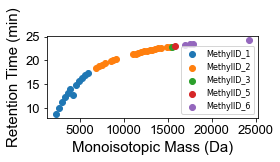

In [108]:
# df_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24203/24203_5p_s3.xlsx')
df_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24203/24203_5p_s3_analysis.xlsx')
# df_5p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24203/24203_5p_s6_analysis.xlsx')
df_5p.head()
plt = matplotlib.pyplot
# if not fig:
fig = plt.figure(figsize=(4, 2))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

for mod_id in df_5p.ModificationId.unique():
    df_tmp = df_5p[df_5p.ModificationId == mod_id]
    plt.scatter(df_tmp.Mass, df_tmp.RT, label=f'MethylID_{mod_id}')

plt.legend(fontsize=8)
output(plt, fig, '24203_5p')

In [90]:
df_auu = pd.read_excel('/Users/bryan/Studio/tools/glu_auu.xlsx')
df_acu = pd.read_excel('/Users/bryan/Studio/tools/glu_acu.xlsx')
df_mock = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/1_Mock_10ul_9min_NewOmics.xlsx')
df_rsv = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/6_RSV1_10ul_9min_NewOmics.xlsx')
df_mock = thermo_df(df_mock)
df_rsv = thermo_df(df_rsv)

df_mock_ad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df_rsv_ad = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df_mock_ad = thermo_df(df_mock_ad)
df_rsv_ad = thermo_df(df_rsv_ad)

In [104]:
df_tmp = df_auu[df_auu.Mass<9000].copy()
df_match_mock = match_dfs(df_tmp, df_mock_ad)
df_tmp.Mass -= 18
df_match_mock_trf = match_dfs(df_tmp, df_mock)
df_match_mock_trf.RT += 17.2

df_tmp = df_acu.copy()
df_match_rsv = match_dfs(df_tmp, df_rsv_ad)
df_tmp.Mass -= 18
df_match_rsv_trf = match_dfs(df_tmp, df_rsv)

df_match_mock.shape, df_match_mock_trf.shape, df_match_rsv.shape, df_match_rsv_trf.shape

((18, 3), (12, 3), (26, 3), (15, 3))

<module 'matplotlib.pyplot' from '/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/matplotlib/pyplot.py'>

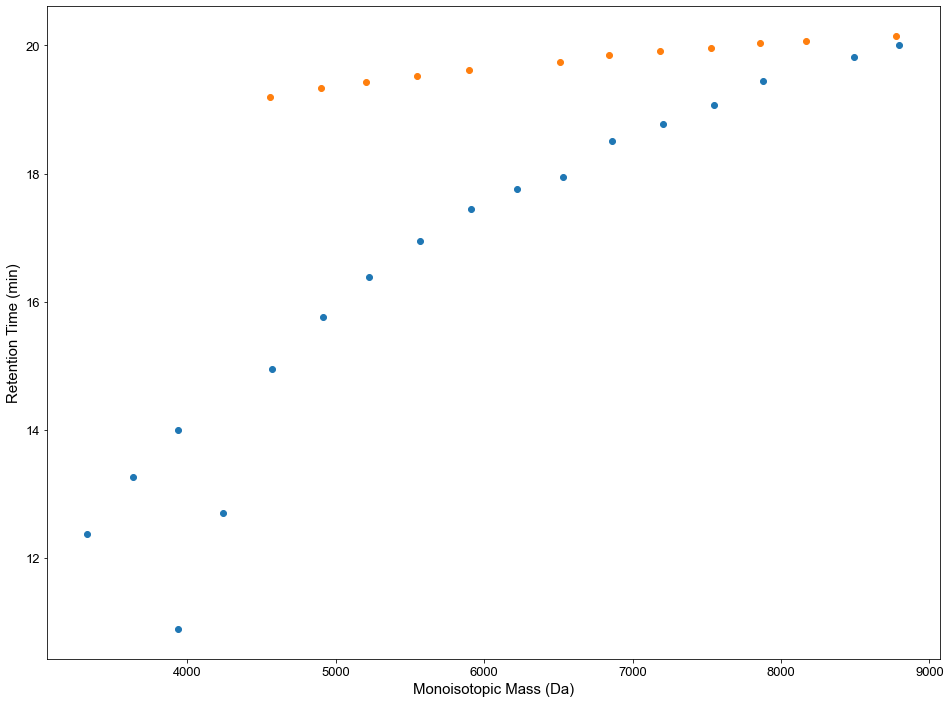

In [106]:
plotly_zones(df_match_mock, df_match_mock_trf)
plot_zones(df_match_mock, df_match_mock_trf)

In [80]:

bcr = base_calling_random(df_mock_trf, silence=True)
plotly_basecalling(*bcr, annotate=False)
# df_seats = process_mass_base_seats(*bcr, full_mass=full_mass, orientation=5)
# out_name = f'/Users/bryan/Documents/BioPharmaFinder/BaoLab/NGS/Shift/seats_{i}.xlsx'
# df_seats.to_excel(out_name)

In [51]:

# df_3p = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/MassSum/FirstBatch/Group_24203/24203_3p_s3.xlsx')
plotly_zone(df_5p)

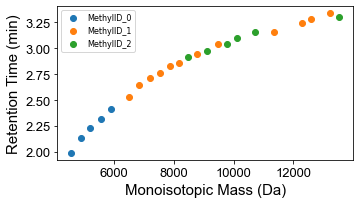

In [47]:
df_u2c = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/Fig4_Data_U2C.xlsx')
df_u2c.head()
plt = matplotlib.pyplot
# if not fig:
fig = plt.figure(figsize=(5, 3))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

for mod_id in df_u2c.ModificationId.unique():
    df_tmp = df_u2c[df_u2c.ModificationId == mod_id]
    plt.scatter(df_tmp.Mass, df_tmp.RT, label=f'MethylID_{mod_id}')

plt.legend(fontsize=8)
output(plt, fig, 'U2C')

In [14]:
df_mass = comm_dots(df3, df6, masses[0])

full_mass 24189.23 sum_value 24207.2
full_mass 24189.23 sum_value 24207.2


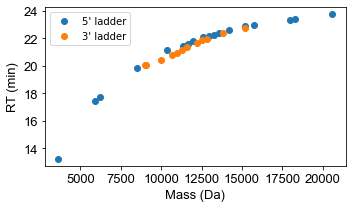

In [26]:
# plt = matplotlib.pyplot
# if not fig:
import matplotlib.pyplot as plt

df_mass = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/ladders_split_s3_24189.xlsx')
df_glu_5p = df_mass[df_mass.is5p==True]
df_glu_3p = df_mass[df_mass.is5p==False]
# plt = matplotlib.pyplot
fig = plt.figure(figsize=(5, 3))
plt.xlabel('Mass (Da)', fontname="Arial", fontsize=13, color='black')
plt.ylabel('RT (min)', fontname="Arial", fontsize=13, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

plt.scatter(df_glu_5p.Mass, df_glu_5p.RT, label="5' ladder")
plt.scatter(df_glu_3p.Mass, df_glu_3p.RT, label="3' ladder")
plt.legend()
output(plt, fig, 'masssum')

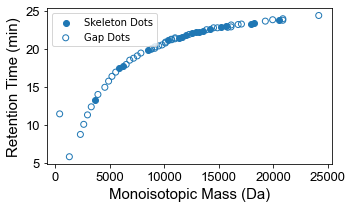

In [27]:
# Glu 24189 Skeleton
df_masssum = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/SourceGlu/masssum_s3_24189_5p.xlsx')
df_glu_skeleton = df_masssum[df_masssum.isSkeleton==True]
df_glu_gap = df_masssum[df_masssum.isSkeleton==False]

fig = plt.figure(figsize=(5, 3))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(fontname="Arial", size=13, color='black')
plt.yticks(fontname="Arial", size=13, color='black')

plt.scatter(df_glu_skeleton.Mass, df_glu_skeleton.RT, label='Skeleton Dots')
plt.scatter(df_glu_gap.Mass, df_glu_gap.RT, label='Gap Dots') # , facecolors='none'

plt.legend() #fontsize=8
output(plt, fig, 'GapFill')

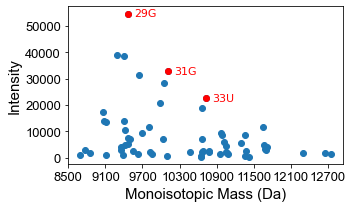

In [28]:
# Glu 24189 Skeleton
df_rsv_diff = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/Fig4_Data_rsv_diff.xlsx')

fig = plt.figure(figsize=(5, 3))
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Intensity', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
plt.xticks(range(8500, 12800, 600), fontname="Arial", size=13, color='black')
plt.yticks( fontname="Arial", size=13, color='black')

plt.scatter(df_rsv_diff.Mass, df_rsv_diff.Vol, label='Skeleton Dots')
df_peak = df_rsv_diff[df_rsv_diff.isPeak==True]
plt.scatter(df_peak.Mass, df_peak.Vol, color='r')
for idx, row in df_peak.iterrows():
    mass = '{:.2f}'.format(row.Mass)
    plt.annotate(text=row.Label, size=11, xy=(row.Mass, row.Vol), textcoords="offset points", xytext=(18, -3), ha='center', color='r')

# plt.legend() #fontsize=8
output(plt, fig, 'CleavageSites')

In [ ]:
# Fig 4 Homology
# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/HomologyData_Fig2.xlsx')
# # plotly_zone(df, y='Vol')
# bcr = base_calling_random(df, homology=True)
# # print(bcr)
# plt, fig = plot_basecalling1(df, bcr[1], y='Vol')
# df_ad = df[df.isAD==True]
# df_noad = df[df.isAD==False]
# plt.scatter(df_ad.Mass, df_ad.Vol, marker='o', s=200, color='g')
# plt.scatter(df_noad.Mass, df_noad.Vol, marker='*', s=200, color='C0')
# output(plt, fig, 'homology')

In [12]:
def plot_basecalling(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, s=20, fig=None, color='C0', marker='o', y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    if not fig:
        fig = plt.figure(figsize=(7, 4))
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
        plt.scatter(x_pos, y_pos, s=s, color=color) #, s=200   , marker=marker
        plt.annotate(text=mass, size=10, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)
#         plt.annotate(text=mass, size=10, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
#                      textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
        plt.plot(df_pair.Mass, df_pair[y], color)
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
        plt.annotate(text=t[2], size=11, xy=(x_pos, y_pos), 
                     textcoords="offset points", xytext=(0, 10), ha='center', color=color)
#         plt.annotate(s=t[2], size=15, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(-10, 10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
#         mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
#         plt.annotate(text=mass, size=10, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
#                      textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)
#         mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
#         plt.annotate(text=mass, size=10, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
#                      textcoords="offset points", xytext=(8, -28), ha='center', rotation=-30, color=color)

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [32]:
def output(plt, fig, svg_name, transparent=True):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig4/{svg_name}.svg', dpi=300, transparent=transparent)



In [18]:
def comm_dots(df1, df2, intact_mass):
    df_ms_1, _ = computational_data_seperation(df1, df1, full_mass=intact_mass, ignore_endpoints=True)
    df_ms_2, _ = computational_data_seperation(df2, df2, full_mass=intact_mass, ignore_endpoints=True)
    df_comm = match_dfs(df_ms_2, df_ms_1)
    return df_comm

In [10]:
df3 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S2to5combined_20ul_40min.xlsx')
df6 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/BaoLab/FirstBatch/Excels/S6to10combined_20ul_40min.xlsx')
df3 = thermo_df(df3)
df6 = thermo_df(df6)
df3.shape, df6.shape

((4593, 3), (2727, 3))

In [11]:

masses = [24189.23, 24203.24, 24217.27, 24231.25]